In [27]:
import numpy as np
import pandas as pd
from sklearn.linear_model import Ridge, Lasso
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.model_selection import train_test_split
from sklearn import model_selection
import matplotlib.pyplot as plt
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import LassoCV

In [2]:
df=pd.read_csv("/content/Hitters.csv")

In [3]:
df

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
0,293,66,1,30,29,14,1,293,66,1,30,29,14,A,E,446,33,20,NaN,A
1,315,81,7,24,38,39,14,3449,835,69,321,414,375,N,W,632,43,10,475.0,N
2,479,130,18,66,72,76,3,1624,457,63,224,266,263,A,W,880,82,14,480.0,A
3,496,141,20,65,78,37,11,5628,1575,225,828,838,354,N,E,200,11,3,500.0,N
4,321,87,10,39,42,30,2,396,101,12,48,46,33,N,E,805,40,4,91.5,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
317,497,127,7,65,48,37,5,2703,806,32,379,311,138,N,E,325,9,3,700.0,N
318,492,136,5,76,50,94,12,5511,1511,39,897,451,875,A,E,313,381,20,875.0,A
319,475,126,3,61,43,52,6,1700,433,7,217,93,146,A,W,37,113,7,385.0,A
320,573,144,9,85,60,78,8,3198,857,97,470,420,332,A,E,1314,131,12,960.0,A


In [4]:
df=df.dropna()

In [ ]:
df


,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
1,315,81,7,24,38,39,14,3449,835,69,321,414,375,N,W,632,43,10,475.0,N
2,479,130,18,66,72,76,3,1624,457,63,224,266,263,A,W,880,82,14,480.0,A
3,496,141,20,65,78,37,11,5628,1575,225,828,838,354,N,E,200,11,3,500.0,N
4,321,87,10,39,42,30,2,396,101,12,48,46,33,N,E,805,40,4,91.5,N
5,594,169,4,74,51,35,11,4408,1133,19,501,336,194,A,W,282,421,25,750.0,A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
317,497,127,7,65,48,37,5,2703,806,32,379,311,138,N,E,325,9,3,700.0,N
318,492,136,5,76,50,94,12,5511,1511,39,897,451,875,A,E,313,381,20,875.0,A
319,475,126,3,61,43,52,6,1700,433,7,217,93,146,A,W,37,113,7,385.0,A
320,573,144,9,85,60,78,8,3198,857,97,470,420,332,A,E,1314,131,12,960.0,A


In [5]:
dms=pd.get_dummies(df[['League','Division','NewLeague']])

In [ ]:
dms


,League_A,League_N,Division_E,Division_W,NewLeague_A,NewLeague_N
1,0,1,0,1,0,1
2,1,0,0,1,1,0
3,0,1,1,0,0,1
4,0,1,1,0,0,1
5,1,0,0,1,1,0
...,...,...,...,...,...,...
317,0,1,1,0,0,1
318,1,0,1,0,1,0
319,1,0,0,1,1,0
320,1,0,1,0,1,0


In [6]:
y=df["Salary"]

In [7]:
X_=df.drop(['Salary','League','Division','NewLeague'],axis=1).astype('float64')

In [8]:
X=pd.concat([X_,dms[['League_N','Division_W','NewLeague_N']]],axis=1)

In [ ]:
X

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,PutOuts,Assists,Errors,League_N,Division_W,NewLeague_N
1,315.0,81.0,7.0,24.0,38.0,39.0,14.0,3449.0,835.0,69.0,321.0,414.0,375.0,632.0,43.0,10.0,1,1,1
2,479.0,130.0,18.0,66.0,72.0,76.0,3.0,1624.0,457.0,63.0,224.0,266.0,263.0,880.0,82.0,14.0,0,1,0
3,496.0,141.0,20.0,65.0,78.0,37.0,11.0,5628.0,1575.0,225.0,828.0,838.0,354.0,200.0,11.0,3.0,1,0,1
4,321.0,87.0,10.0,39.0,42.0,30.0,2.0,396.0,101.0,12.0,48.0,46.0,33.0,805.0,40.0,4.0,1,0,1
5,594.0,169.0,4.0,74.0,51.0,35.0,11.0,4408.0,1133.0,19.0,501.0,336.0,194.0,282.0,421.0,25.0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
317,497.0,127.0,7.0,65.0,48.0,37.0,5.0,2703.0,806.0,32.0,379.0,311.0,138.0,325.0,9.0,3.0,1,0,1
318,492.0,136.0,5.0,76.0,50.0,94.0,12.0,5511.0,1511.0,39.0,897.0,451.0,875.0,313.0,381.0,20.0,0,0,0
319,475.0,126.0,3.0,61.0,43.0,52.0,6.0,1700.0,433.0,7.0,217.0,93.0,146.0,37.0,113.0,7.0,0,1,0
320,573.0,144.0,9.0,85.0,60.0,78.0,8.0,3198.0,857.0,97.0,470.0,420.0,332.0,1314.0,131.0,12.0,0,0,0


In [9]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=42)

In [ ]:
df.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
1,315,81,7,24,38,39,14,3449,835,69,321,414,375,N,W,632,43,10,475.0,N
2,479,130,18,66,72,76,3,1624,457,63,224,266,263,A,W,880,82,14,480.0,A
3,496,141,20,65,78,37,11,5628,1575,225,828,838,354,N,E,200,11,3,500.0,N
4,321,87,10,39,42,30,2,396,101,12,48,46,33,N,E,805,40,4,91.5,N
5,594,169,4,74,51,35,11,4408,1133,19,501,336,194,A,W,282,421,25,750.0,A


In [ ]:
ridge_model=Ridge(alpha=5).fit(X_train, y_train)

In [ ]:
ridge_model

Ridge(alpha=5)

In [ ]:
ridge_model.coef_

array([ -1.81040449,   8.87872786,   7.12487047,  -3.31713488,
        -2.01162162,   5.40691525,   7.25828404,  -0.13033385,
        -0.25425913,  -0.71109275,   1.81452   ,   0.77083457,
        -0.6768975 ,   0.26211894,   0.2646614 ,  -0.36947934,
        76.19519054, -90.15523668, -16.00453535])

In [ ]:
ridge_model.intercept_

-3.425196868717876

In [ ]:
np.linspace(10,-2,100)

array([10.        ,  9.87878788,  9.75757576,  9.63636364,  9.51515152,
        9.39393939,  9.27272727,  9.15151515,  9.03030303,  8.90909091,
        8.78787879,  8.66666667,  8.54545455,  8.42424242,  8.3030303 ,
        8.18181818,  8.06060606,  7.93939394,  7.81818182,  7.6969697 ,
        7.57575758,  7.45454545,  7.33333333,  7.21212121,  7.09090909,
        6.96969697,  6.84848485,  6.72727273,  6.60606061,  6.48484848,
        6.36363636,  6.24242424,  6.12121212,  6.        ,  5.87878788,
        5.75757576,  5.63636364,  5.51515152,  5.39393939,  5.27272727,
        5.15151515,  5.03030303,  4.90909091,  4.78787879,  4.66666667,
        4.54545455,  4.42424242,  4.3030303 ,  4.18181818,  4.06060606,
        3.93939394,  3.81818182,  3.6969697 ,  3.57575758,  3.45454545,
        3.33333333,  3.21212121,  3.09090909,  2.96969697,  2.84848485,
        2.72727273,  2.60606061,  2.48484848,  2.36363636,  2.24242424,
        2.12121212,  2.        ,  1.87878788,  1.75757576,  1.63

In [ ]:
lambda_values=10**np.linspace(10,-2,100)*0.5

In [ ]:
lambda_values

NameError: ignored

In [ ]:
ridge_model=Ridge()
coefficients=[]

for i in lambda_values:
  ridge_model.set_params(alpha=i)
  ridge_model.fit(X_train,y_train)
  coefficients.append(ridge_model.coef_)

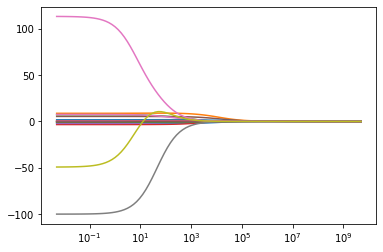

In [ ]:
ax=plt.gca()
ax.plot(lambda_values, coefficients)
ax.set_xscale("log")

In [ ]:
ridge_model=Ridge().fit(X_train,y_train)

In [ ]:
ridge_model

Ridge()

In [ ]:
y_pred=ridge_model.predict(X_train)

In [ ]:
RMSE = np.sqrt(mean_squared_error(y_train,y_pred))

In [ ]:
RMSE

289.34470696006565

In [ ]:
from sklearn.model_selection import cross_val_score

In [ ]:
np.sqrt(np.mean(-cross_val_score(ridge_model, X_train, y_train, cv=10, scoring="neg_mean_squared_error")))

351.39315856063195

In [ ]:
y_pred=ridge_model.predict(X_test)
RMSE=np.sqrt(mean_squared_error(y_test,y_pred))

In [ ]:
RMSE

356.8082905730239

In [ ]:
lambda_values1=np.random.randint(0,1000,100)
lambda_values2=10**np.linspace(10,-2,100)*0.5

In [ ]:
lambda_values1

array([769, 637, 348,   0,  84, 144,  18, 647, 196, 230,  42, 971, 668,
       223, 543, 903, 169, 322, 976,  73, 875, 376,  35, 285, 565, 823,
       506, 330, 660, 255, 661, 705, 852,  72, 564, 497, 935, 990,  94,
       647, 387, 851, 850, 348, 781, 236, 255, 721, 857, 834, 727, 673,
       909, 368, 152, 679, 592, 637, 209, 155, 170, 839, 664, 246, 812,
       696, 270, 506,  12, 961, 536, 778, 697, 140, 367, 705, 738, 996,
       412, 695, 891,  69,  44, 591, 249, 694,  42, 847, 381, 298, 170,
       200, 347, 307, 600, 667,  84,  13, 406, 440])

In [ ]:
lambda_values2

array([5.00000000e+09, 3.78231664e+09, 2.86118383e+09, 2.16438064e+09,
       1.63727458e+09, 1.23853818e+09, 9.36908711e+08, 7.08737081e+08,
       5.36133611e+08, 4.05565415e+08, 3.06795364e+08, 2.32079442e+08,
       1.75559587e+08, 1.32804389e+08, 1.00461650e+08, 7.59955541e+07,
       5.74878498e+07, 4.34874501e+07, 3.28966612e+07, 2.48851178e+07,
       1.88246790e+07, 1.42401793e+07, 1.07721735e+07, 8.14875417e+06,
       6.16423370e+06, 4.66301673e+06, 3.52740116e+06, 2.66834962e+06,
       2.01850863e+06, 1.52692775e+06, 1.15506485e+06, 8.73764200e+05,
       6.60970574e+05, 5.00000000e+05, 3.78231664e+05, 2.86118383e+05,
       2.16438064e+05, 1.63727458e+05, 1.23853818e+05, 9.36908711e+04,
       7.08737081e+04, 5.36133611e+04, 4.05565415e+04, 3.06795364e+04,
       2.32079442e+04, 1.75559587e+04, 1.32804389e+04, 1.00461650e+04,
       7.59955541e+03, 5.74878498e+03, 4.34874501e+03, 3.28966612e+03,
       2.48851178e+03, 1.88246790e+03, 1.42401793e+03, 1.07721735e+03,
      

In [ ]:
ridgecv=RidgeCV(alphas=lambda_values1,scoring="neg_mean_squared_error",cv=10,normalize=True)
ridgecv.fit(X_train,y_train)

In [ ]:
ridgecv.alpha_

0

In [ ]:
ridge_tuned=Ridge(alpha=ridgecv.alpha_).fit(X_train,y_train)
y_pred=ridge_tuned.predict(X_test)
np.sqrt(mean_squared_error(y_test,y_pred))

357.05329094607447

In [12]:
lasso_model = Lasso().fit(X_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.257e+06, tolerance: 3.899e+03
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


In [13]:
lasso_model.intercept_

-5.587450677335255

In [14]:
lasso_model.coef_

array([-1.74875691e+00,  8.59204135e+00,  6.67993798e+00, -3.06715333e+00,
       -1.91843070e+00,  5.32372890e+00,  8.39184117e+00, -1.63172447e-01,
       -8.22311277e-02, -3.93602861e-01,  1.71118530e+00,  6.55730545e-01,
       -6.48379405e-01,  2.59815358e-01,  2.73041157e-01, -4.41440454e-01,
        8.54474011e+01, -9.59701213e+01, -2.13086605e+01])

In [10]:
lasso=Lasso()
coefs=[]
alphas=np.random.randint(0,1000,100)
for a in alphas:
  lasso.set_params(alpha=a)
  lasso.fit(X_train,y_train)
  coefs.append(lasso.coef_)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.142e+03, tolerance: 3.899e+03
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.386e+04, tolerance: 3.899e+03
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisa

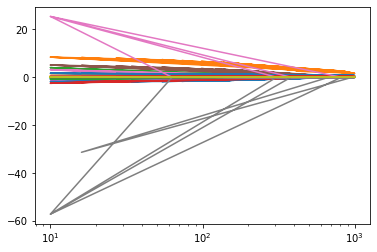

In [15]:
ax=plt.gca()
ax.plot(alphas,coefs)
ax.set_xscale("log")

In [16]:
lasso_model.predict(X_train)[:5]

array([377.26270596, 786.51524513, 495.14140718, 117.19492966,
       429.04228506])

In [17]:
lasso_model.predict(X_test)[:5]

array([ 609.18826367,  696.96810702, 1009.06157391,  412.22773375,
        409.25851712])

In [18]:
y_pred = lasso_model.predict(X_test)
np.sqrt(mean_squared_error(y_test,y_pred))


356.09758845540324

In [19]:
r2_score(y_test, y_pred)

0.414227981323662

In [28]:
lasso_cv=LassoCV(alphas=np.random.randint(0,1000,100),cv=10,max_iter=100000).fit(X_train,y_train)

In [29]:
lasso_cv.alpha_

186

In [30]:
lasso_tuned=Lasso().set_params(alpha=lasso_cv.alpha_).fit(X_train,y_train)
y_pred_tuned=lasso_tuned.predict(X_test)
np.sqrt(mean_squared_error(y_test,y_pred_tuned))

363.0497306597977

In [31]:
pd.Series(lasso_tuned.coef_, index=X_train.columns)

AtBat         -1.132148
Hits           5.545718
HmRun          0.000000
Runs           0.000000
RBI            0.000000
Walks          2.794677
Years          0.000000
CAtBat        -0.169961
CHits          0.228254
CHmRun        -0.000000
CRuns          1.063636
CRBI           0.472739
CWalks        -0.213008
PutOuts        0.272994
Assists        0.177384
Errors        -0.000000
League_N       0.000000
Division_W    -0.000000
NewLeague_N    0.000000
dtype: float64